In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
import negf_vibrational_modes as negf_method

In [3]:
import current_vibrational_modes as current_method

In [4]:
def func_Varray_G2(Vmax,hbaromega,npoints):
    
    
    assert Vmax > hbaromega, 'hbaromega must be smaller than Vmax'
    
    npoint_half = int(npoints -1)/2
    
    ndens2 = int(npoint_half*(2/3))
    ndens1 = int(npoint_half*(1/6))
    
    V1 = np.linspace(0,hbaromega*(1-0.5),ndens1)
    V2 = np.linspace(hbaromega*(1-0.5),hbaromega*(1+0.5),ndens2)
    V3 = np.linspace(hbaromega*(1+0.5),Vmax,ndens1)
    Vpos = np.unique(np.concatenate((np.concatenate((V1,V2)),V3) ))
    
    Vlist_total = np.concatenate((-np.flip(Vpos),Vpos))
    
    return np.unique(Vlist_total)

In [5]:
def find_closest_eigenvalues(HHamiltonian0,ef,steps =4):
    
    eigenvalues,eigenvector = np.linalg.eigh(Hamiltonian0)
    ef = 1
    eigenvalue_referenced_ef = abs(np.unique(eigenvalues) - ef )


    eigenvalues_relevant = []

    for k in range(steps):

        index = np.where(eigenvalue_referenced_ef == min(eigenvalue_referenced_ef))[0][0]
        eigenvalues_relevant.append(eigenvalues[index])
        eigenvalue_referenced_ef = np.delete(eigenvalue_referenced_ef, index)

    return eigenvalues,eigenvalues_relevant

def maximum_voltage_estimate(Hamiltonian0,ef,hbaromega,Vmax,steps =4):
    
    eigenvalues,eigenvalues_relevant = find_closest_eigenvalues(Hamiltonian0,ef,steps)
    
    
    color_array = ['pink', 'black', 'green','purple']
    
    
    for i in range(len(np.unique(eigenvalues_relevant))):
        ev = np.unique(eigenvalues_relevant)[i]
        plt.axvline(ev,color=color_array[i],label = 'ev$_{}$'.format(i))
    plt.axvline(ef + Vmax/2,color ='red',label ='$\mu_L$')
    plt.axvline(ef - Vmax/2,color ='orange',label ='$\mu_R$')
    plt.legend(loc='best')
    plt.show()
    
    


    Vmax_et = 2*min(abs(eigenvalues- ef) )
    
    
    plt.axvline(hbaromega,color ='pink',label ='$\hbar\omega$')
    plt.axvline(Vmax,color ='red',label ='$Vmax$')
    plt.axvline( -Vmax,color ='orange',label ='$-Vmax$')
    plt.legend()
    plt.show()
    
    
    
    assert hbaromega < Vmax_et, 'Choose smaller value for \hbar\omega. \hbar\omega = {},Vmax_et = {}'.format(hbaromega,Vmax_et)
    assert Vmax < Vmax_et, 'Choose smaller value for Vmax. Vmax = {},Vmax_est = {}'.format(Vmax,Vmax_et)
    assert hbaromega < Vmax, 'Choose smaller value for \hbar\omega. \hbar\omega = {},Vmax = {}'.format(hbaromega,Vmax)
    assert hbaromega > 0, 'Choose positive value for hbaromega'

    print(eigenvalues)
    
    
    return Vmax_et

In [6]:
def eigenvalues_monatomic_chain(epsilon0,t,dim):
    ilist = np.arange(1,dim+1,1)
    eigenvalues = epsilon0 - 2*t*np.cos(ilist*np.pi/(dim + 1))
    return eigenvalues
    

## Scattering Region

In [7]:
import ChiralChainModel_git as geom
import vib_modes_ChiralChainModel as lambda_vib_geom

In [8]:
Lm = 4             #number of sites 
chirality = True   #handedness of molecule 
N = Lm             # Number of sites within one winding
M = 1              # Number of windings
a = 1              # radius of helix
c = 1              # pitch of helix


epsilon0 = 0 # onsite energy
t = 2    # hopping paramter (extreme example to show code reproduces standard things)

# List of Spin-Orbit Coupling parameter
lambda_soc = (1*(10**-1))*t



#Gamma Matrix
kmax  = 4      # Number spin up + down sites coupled to each lead
gamma = 0.2*t    # coupling strength
pz    = 0.5    # magnetic polarization


T = 100 # Kelvin Temperature of leads
betaL,betaR = negf_method.func_beta(T), negf_method.func_beta(T) # 1/ElectronVolt

print(betaL,betaR)

lambda_vib = 4*(10**(-1))*t
lambda_vib_soc = 0
hbaromega = 0.25


116.04505008098202 116.04505008098202


/Users/khhuisman/Documents/Jupyternotebooks/VibtrationalModes_Troisi/ChiralChainModel_git.py:139: RuntimeWarning: Kwant's plotting functions have
the side effect of selecting the matplotlib backend. To avoid this warning,
import matplotlib.pyplot, matplotlib.backends or call matplotlib.use().
  kwant.plot(system);


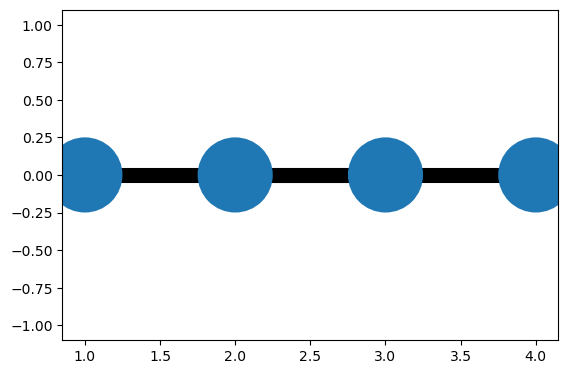

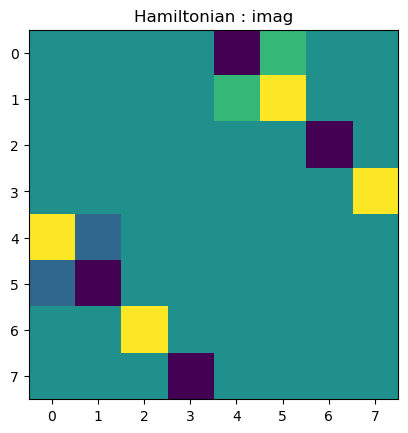

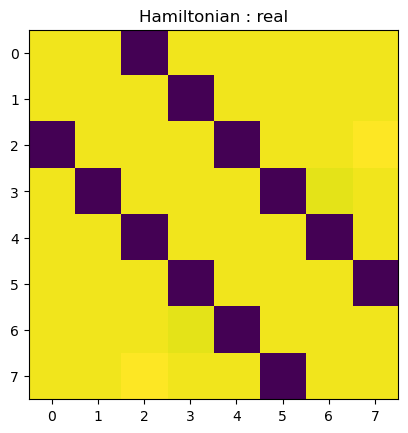

In [9]:
GammaR,GammaLP,GammaLM,Hamiltonian0,hamiltonian_shape= geom.system_hamiltonian0(Lm,
                                                                                        epsilon0,t, 
                                                                                  lambda_soc,chirality,
                                                                                  a,c,M,N,
                                                                                    kmax,gamma,abs(pz))

dim = hamiltonian_shape[0]

plt.title('Hamiltonian : imag')
plt.imshow(Hamiltonian0.imag)
plt.show()

plt.title('Hamiltonian : real')
plt.imshow(Hamiltonian0.real)
plt.show()

## Vibrational Modes

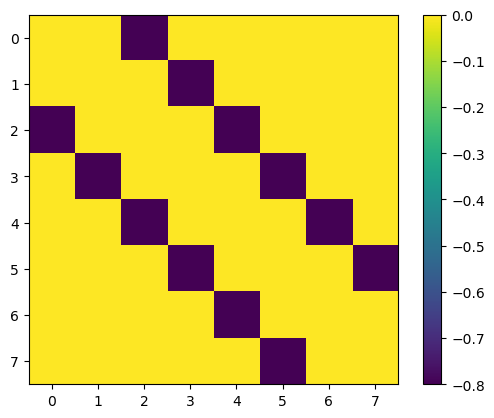

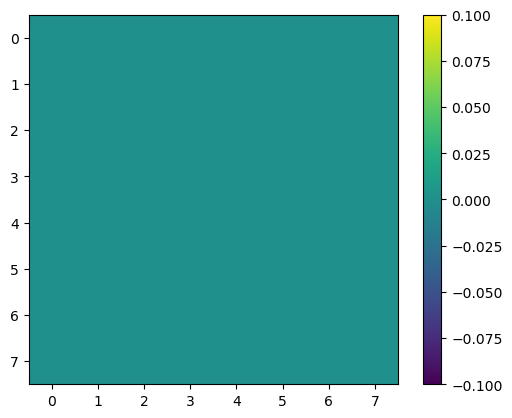

In [10]:

# #### matrix with constant entries
lambda_vib_mat = lambda_vib_geom.vibmode_NNNsoc(Lm,epsilon0,lambda_vib, 
                                                lambda_vib_soc,chirality,a,c,M,N)


plt.imshow(lambda_vib_mat.real)
plt.colorbar()
plt.show()

plt.imshow(lambda_vib_mat.imag)
plt.colorbar()
plt.show()



# #### diagonal matrix
# lambda_vib_mat = lambda_vib*np.identity(dim,dtype =complex)
# lambda_vib_mat_list.append(lambda_vib_mat_list)

# plt.imshow(lambda_vib_mat.real)
# plt.colorbar()
# plt.show()

# #### partially diagonal matrix
# lambda_vib_mat = np.zeros((dim,dim),dtype =complex)
# lambda_vib_mat[0:2,0:2]= lambda_vib*np.identity(2)
# lambda_vib_mat_list.append(lambda_vib_mat_list)

# plt.imshow(lambda_vib_mat.real)
# plt.colorbar()
# plt.show()

## Bias Window

In [11]:
ef = 0
eta = 0.5

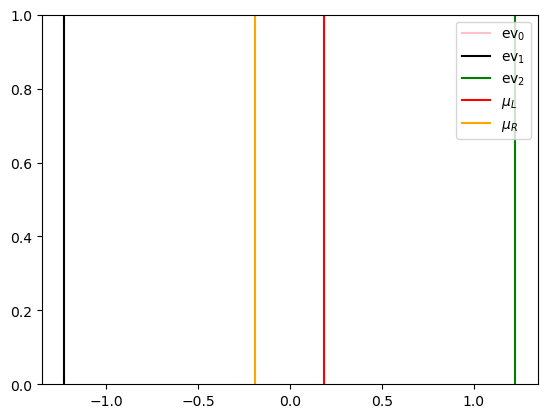

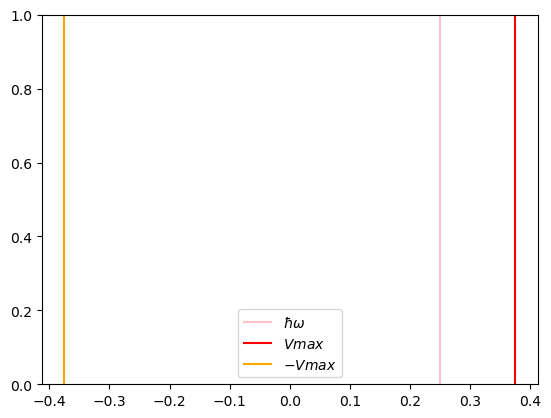

[-3.2452385  -3.2452385  -1.22732302 -1.22732302  1.22732302  1.22732302
  3.2452385   3.2452385 ]


0.375

In [12]:
Vmax = hbaromega*(1 + 0.5)
Vmax_elec_trans =  maximum_voltage_estimate(Hamiltonian0,ef,hbaromega,Vmax)

Vmax

# Elastic Transmissions

The elastic transmission satisfies Büttiker reciprocity : $T_{LR}(m) = T_{LR}(-m)$ as expected.
An elastic magnetocurrent is thereby prohibited. 

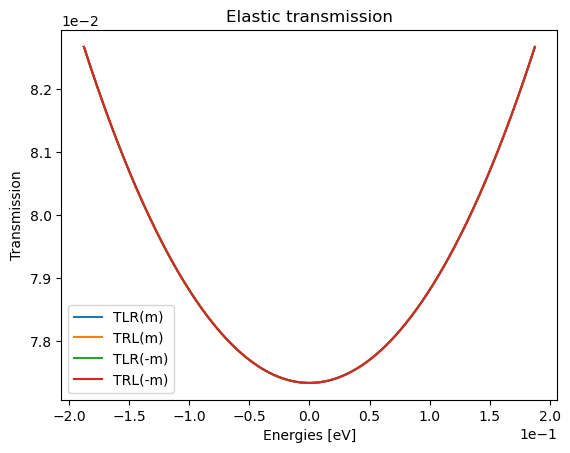

In [13]:
energies = np.linspace(ef-Vmax/2,ef + Vmax/2,1000)

### Inelastic transmission
TLRP = negf_method.TLR(energies,Hamiltonian0,dim,GammaLP,GammaR)
TRLP = negf_method.TRL(energies,Hamiltonian0,dim,GammaLP,GammaR)

TLRM = negf_method.TLR(energies,Hamiltonian0,dim,GammaLM,GammaR)
TRLM = negf_method.TRL(energies,Hamiltonian0,dim,GammaLM,GammaR)

plt.title('Elastic transmission')
plt.plot(energies,TLRP,label = 'TLR(m)')
plt.plot(energies,TRLP,label = 'TRL(m)')
plt.plot(energies,TLRM,label = 'TLR(-m)')
plt.plot(energies,TRLM,label = 'TRL(-m)')
plt.xlabel('Energies [eV]')
plt.ylabel('Transmission')
plt.ticklabel_format(style="sci", scilimits=(0,0))
plt.legend()
plt.show()



# Inelastic Transmissions

1. The inelastic transmission does not satisfy Büttiker reciprocity thereby alowing for a finite, inelastic magnetocurrent.
2. Magnetocurrent is non-zero if $T^{LR}_{inel.}(m) \neq T^{LR}_{inel.}(-m)$

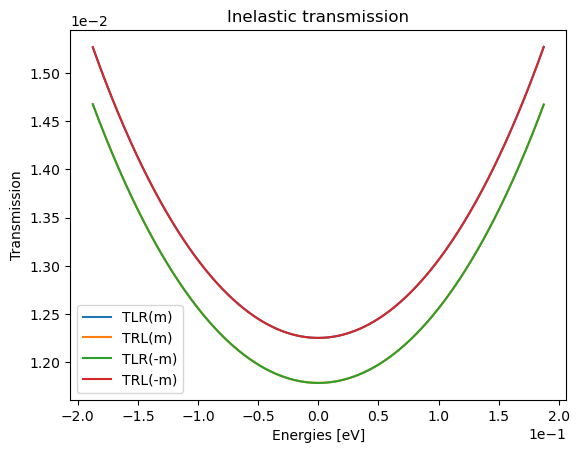

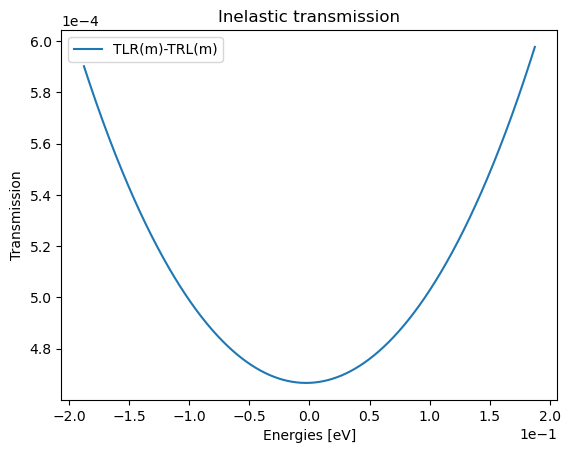

In [14]:

### Inelastic transmission
TLR_inelP = negf_method.TLR_inel_energy(energies,Hamiltonian0,dim,GammaLP,GammaR,lambda_vib_mat,hbaromega)
TRL_inelP = negf_method.TRL_inel_energy(energies,Hamiltonian0,dim,GammaLP,GammaR,lambda_vib_mat,hbaromega)

### Inelastic transmission
TLR_inelM = negf_method.TLR_inel_energy(energies,Hamiltonian0,dim,GammaLM,GammaR,lambda_vib_mat,hbaromega)
TRL_inelM = negf_method.TRL_inel_energy(energies,Hamiltonian0,dim,GammaLM,GammaR,lambda_vib_mat,hbaromega)

plt.title('Inelastic transmission')
plt.plot(energies,TLR_inelP,label = 'TLR(m)')
plt.plot(energies,TRL_inelP,label = 'TRL(m)')
plt.plot(energies,TLR_inelM,label = 'TLR(-m)')
plt.plot(energies,TRL_inelM,label = 'TRL(-m)')
plt.xlabel('Energies [eV]')
plt.ylabel('Transmission')
plt.legend()
plt.ticklabel_format(style="sci", scilimits=(0,0))
plt.show()



plt.title('Inelastic transmission')
plt.plot(energies,TLR_inelP - TRL_inelP,label = 'TLR(m)-TRL(m)')
plt.xlabel('Energies [eV]')
plt.ylabel('Transmission')
plt.ticklabel_format(style="sci", scilimits=(0,0))
plt.legend()
plt.show()


# Currents

In [15]:
nround = 10 ### To which accuracy integrand is rounded
npoints_integrate = 1000 
Vlist = current_method.func_bias_voltages(Vmax=Vmax,Vnpoints=101)
Vlist = func_Varray_G2(Vmax,hbaromega,npoints=201)
nround_V0 = 10 ### To which accuracy current at Vbias = 0 is rounded

In [16]:
Icurrent_elasticP,Icurrent_inelasticP,Icurrent_totP = current_method.current_total(Vlist,ef,
                          npoints_integrate,nround
                          ,Hamiltonian0,dim,GammaLP,GammaR,betaL,betaR,lambda_vib_mat,hbaromega,eta,
                        plot_bool=False,nround_V0=nround_V0)


Icurrent_elasticM,Icurrent_inelasticM,Icurrent_totM = current_method.current_total(Vlist,ef,
                          npoints_integrate,nround
                          ,Hamiltonian0,dim,GammaLM,GammaR,betaL,betaR,lambda_vib_mat,hbaromega,eta,
                        plot_bool=False,nround_V0=nround_V0)


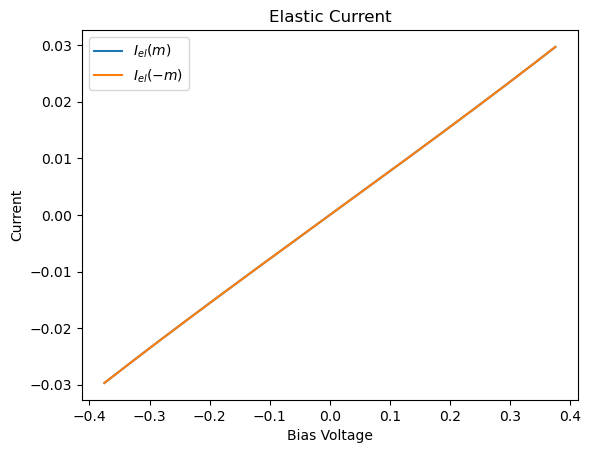

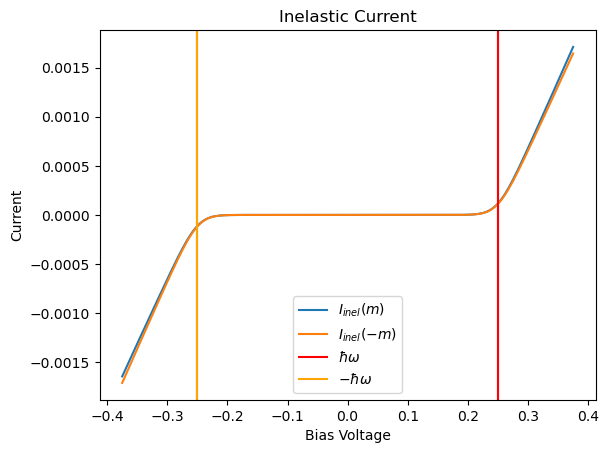

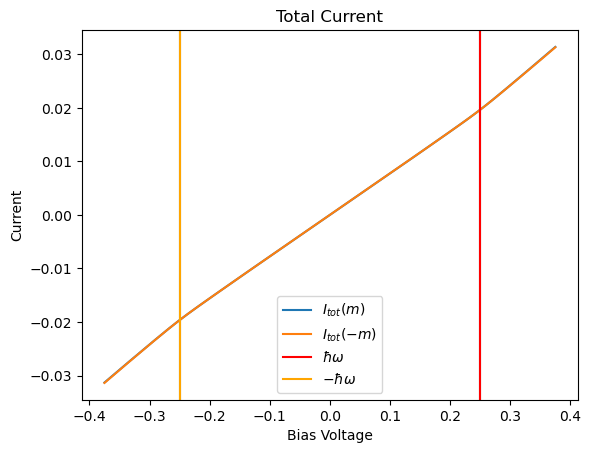

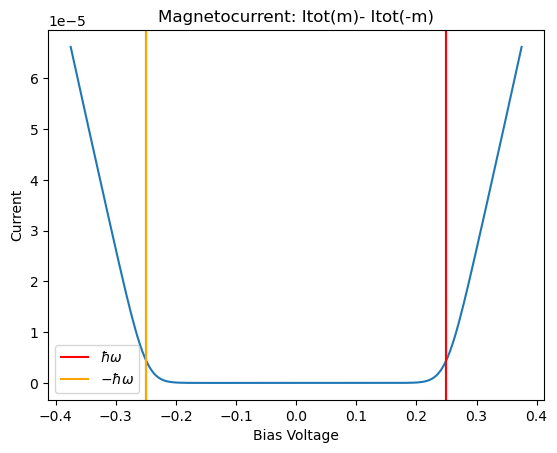

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


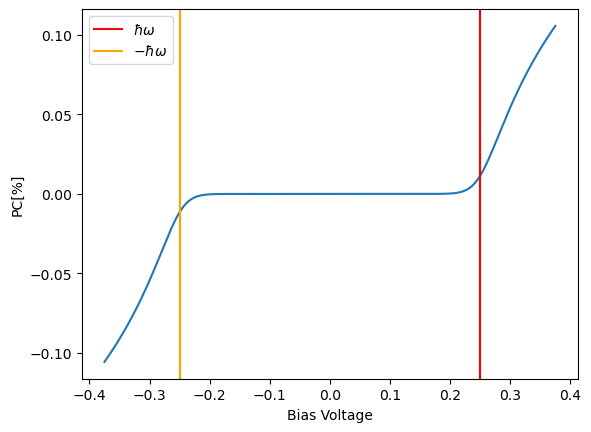

In [17]:
plt.title('Elastic Current')
plt.plot(Vlist,Icurrent_elasticP,label = '$I_{el}(m)$')
plt.plot(Vlist,Icurrent_elasticM,label = '$I_{el}(-m)$')
plt.xlabel('Bias Voltage')
plt.ylabel('Current')
plt.legend()
plt.show()

plt.title('Inelastic Current')
plt.plot(Vlist,Icurrent_inelasticP,label = '$I_{inel}(m)$')
plt.plot(Vlist,Icurrent_inelasticM,label = '$I_{inel}(-m)$')
plt.axvline(hbaromega)
plt.axvline(-hbaromega)
plt.xlabel('Bias Voltage')
plt.ylabel('Current')
plt.legend()
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend()
plt.show()

plt.title('Total Current')
plt.plot(Vlist,Icurrent_totP,label = '$I_{tot}(m)$')
plt.plot(Vlist,Icurrent_totM,label = '$I_{tot}(-m)$')
plt.axvline(hbaromega)
plt.axvline(-hbaromega)
plt.xlabel('Bias Voltage')
plt.ylabel('Current')
plt.legend()
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend()
plt.show()

plt.title('Magnetocurrent: Itot(m)- Itot(-m)')
plt.plot(Vlist,Icurrent_totP-Icurrent_totM)
plt.axvline(hbaromega)
plt.axvline(-hbaromega)
plt.xlabel('Bias Voltage')
plt.ylabel('Current')
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend()
plt.show()

Varray_prime,PC_array = current_method.func_PC_list(Icurrent_totP,Icurrent_totM,Vlist)
plt.plot(Varray_prime,PC_array)
plt.axvline(hbaromega)
plt.axvline(-hbaromega)
plt.xlabel('Bias Voltage')
plt.ylabel('PC[%]')
plt.legend()
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend()
plt.show()

In [18]:
npoints = 201
Vlist_G = func_Varray_G2(Vmax,hbaromega,npoints=npoints)

In [19]:
G1_arrayP = current_method.differential_conductance_voltage(Vlist_G,ef,
                              npoints_integrate,nround
                              ,betaL,betaR,
                                Hamiltonian0,dim,
                                 GammaLP,GammaR,lambda_vib_mat,hbaromega,eta,plot_bool=False)




In [20]:
G1_arrayM = current_method.differential_conductance_voltage(Vlist_G,ef,
                              npoints_integrate,nround
                              ,betaL,betaR,
                                Hamiltonian0,dim,
                                 GammaLM,GammaR,lambda_vib_mat,hbaromega,eta,plot_bool=False)

In [22]:
Varray_G2 = func_Varray_G2(Vmax,hbaromega,npoints=npoints)

In [23]:
G2_arrayP = current_method.second_differential_conductance_voltage(Varray_G2,ef,
                              npoints_integrate,nround
                              ,betaL,betaR,
                                Hamiltonian0,dim,
                                 GammaLP,GammaR,lambda_vib_mat,hbaromega,eta,plot_bool=False)

G2_arrayM = current_method.second_differential_conductance_voltage(Varray_G2,ef,
                              npoints_integrate,nround
                              ,betaL,betaR,
                                Hamiltonian0,dim,
                                 GammaLM,GammaR,lambda_vib_mat,hbaromega,eta,plot_bool=False)

/Users/khhuisman/Documents/Jupyternotebooks/VibtrationalModes_Troisi/negf_vibrational_modes.py:430: RuntimeWarning: invalid value encountered in divide
  fdpp = (mui_prime**2)*(2*beta**2)*((np.sinh(0.5*beta*(energy-mui))/np.sinh(beta*(energy-mui)))**3)*(np.sinh(0.5*beta*(energy-mui)))


In [24]:
nround = 15 ### To which accuracy integrand is rounded
npoints_integrate = 8000 
npoints = 201
nround_V0 = 10 ### To which accuracy current at Vbias = 0 is rounded




omega_list = [hbaromega]

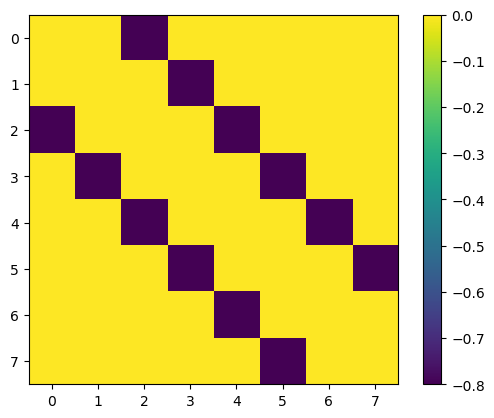

In [25]:
plt.imshow(lambda_vib_mat.real)
plt.colorbar()
plt.show()

In [26]:
save_bool = False
path = 'Results_figures_chiralchain/'
# path = 'Results_figures_chiralchain_temperature30K/'
size = 18
size2 = 14

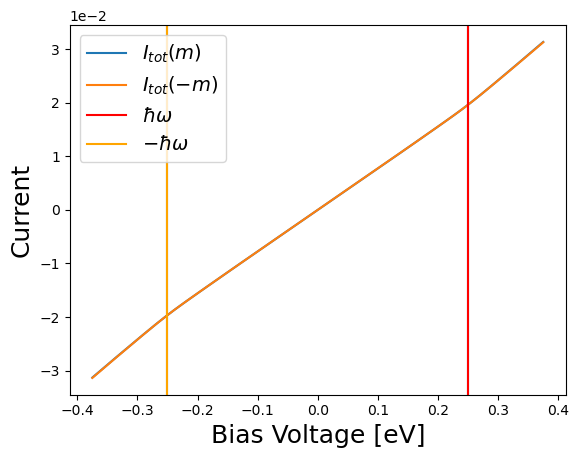

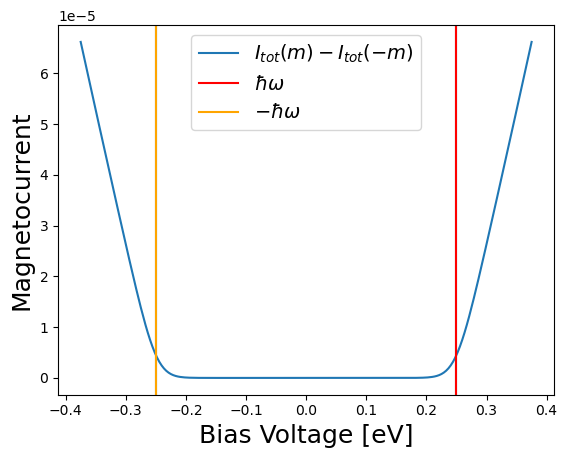

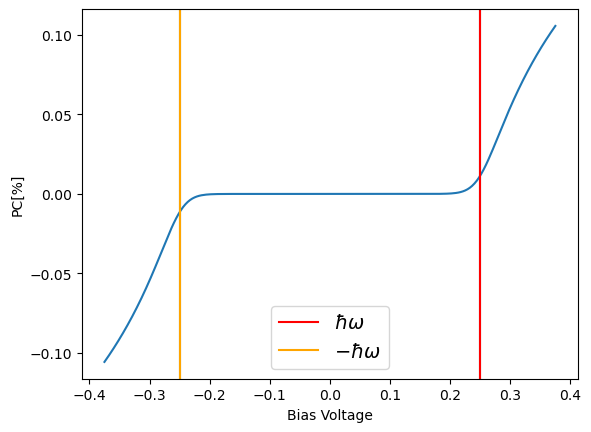

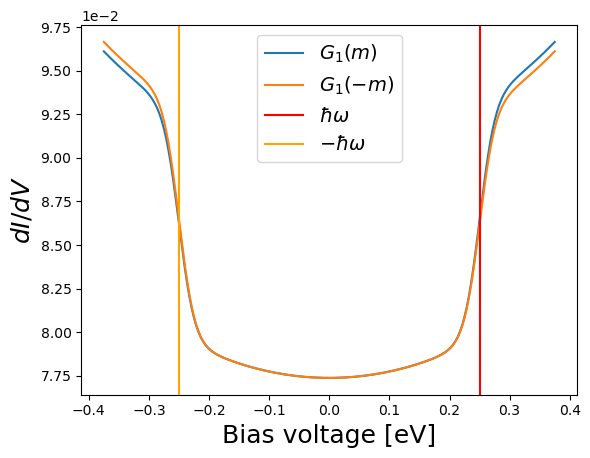

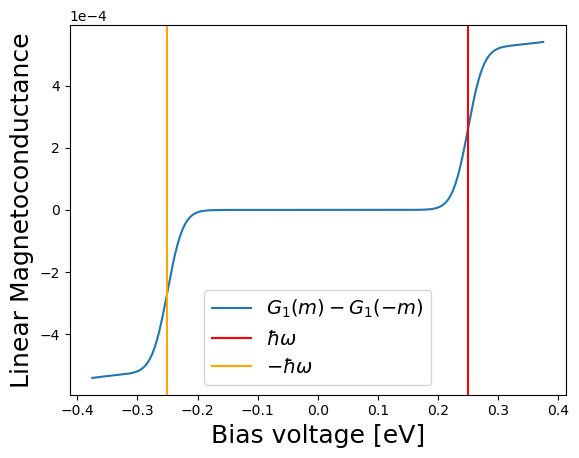

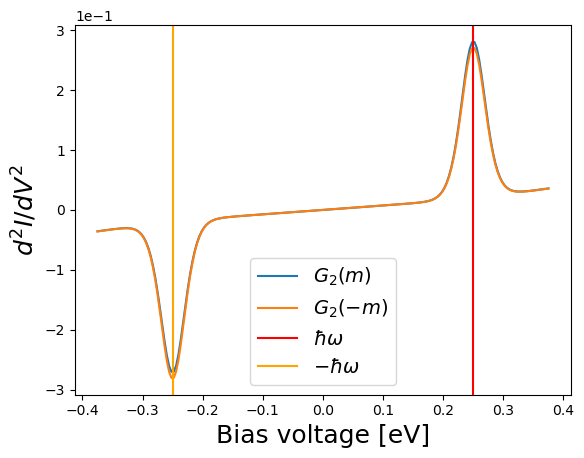

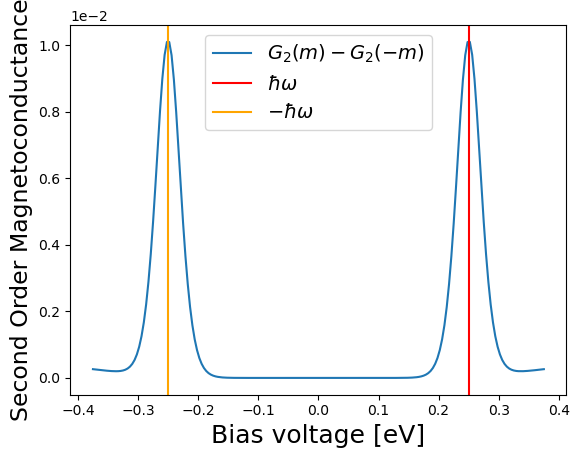

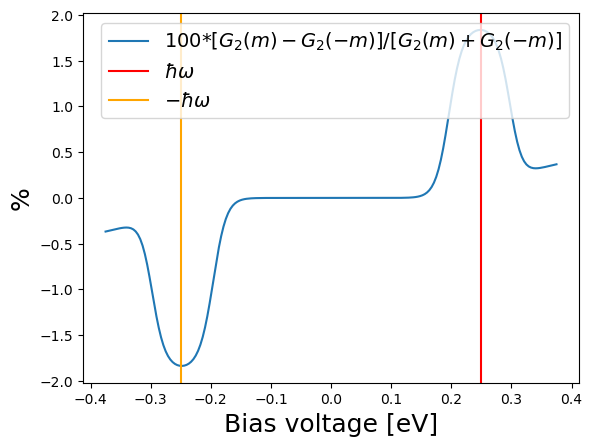

In [27]:
if save_bool == True:
    [N,M,a,c,chirality,epsilon0,t,lambda_soc,kmax,gamma,pz,T,lambda_vib,hbaromega,ef,eta,Vmax,npoints_integrate,nround,nround_V0]

    string = 'N{}M{}a{}c{}chirality{}epsilon0{}t{}lambda_soc{}kmax{}gamma{}pz{}T{}lambda_vib{}hbaromega{}ef{}eta{}Vmax{}npoints_integrate{}nround{}nround_V0{}'.format(N,M,a,c,chirality,epsilon0,t,lambda_soc,kmax,gamma,pz,T,lambda_vib,hbaromega,ef,eta,Vmax,npoints_integrate,nround,nround_V0)

   

    parametersfile = open(path + 'parameters', "w")
    parametersfile.write(str([N,M,a,c,chirality,epsilon0,t,lambda_soc,kmax,gamma,pz,T,lambda_vib,hbaromega,ef,eta,Vmax,npoints_integrate,nround,nround_V0]))
    parametersfile.close()





plt.plot(Vlist,Icurrent_totP,label = '$I_{tot}( m)$')
plt.plot(Vlist,Icurrent_totM,label = '$I_{tot}(-m)$')
plt.axvline(hbaromega)
plt.axvline(-hbaromega)
plt.xlabel('Bias Voltage [eV]',size = size)
plt.ylabel('Current',size = size)
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
if save_bool == True:
    plt.savefig(path + 'total_current_chiralchain.png' ,dpi = 500)
    plt.savefig(path + 'total_current_chiralchain.pdf' ,dpi = 500)
plt.show()


plt.plot(Vlist,Icurrent_totP-Icurrent_totM,label = '$I_{tot}(m)-I_{tot}(-m)$')
plt.axvline(hbaromega)
plt.axvline(-hbaromega)
plt.xlabel('Bias Voltage [eV]',size = size)
plt.ylabel('Magnetocurrent',size = size)
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
if save_bool == True:
    plt.savefig(path + 'total_magnetocurrent_chiralchain.png',dpi = 500)
    plt.savefig(path + 'total_magnetocurrent_chiralchain.pdf',dpi = 500)
plt.show()


Varray_prime,PC_array = current_method.func_PC_list(Icurrent_totP,Icurrent_totM,Vlist)
plt.plot(Varray_prime,PC_array)
plt.axvline(hbaromega)
plt.axvline(-hbaromega)
plt.xlabel('Bias Voltage')
plt.ylabel('PC[%]')
plt.axvline( hbaromega,label = '$ \hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.show()


########## G1
indexlist_combined = np.where(np.logical_and( np.isnan(G1_arrayP),np.isnan(G1_arrayM))==False
                             )[0]
G1_arrayP = np.array([G1_arrayP[index] for index in indexlist_combined])
G1_arrayM = np.array([G1_arrayM[index] for index in indexlist_combined])
Varray_G = np.array([Vlist_G[index] for index in indexlist_combined])


plt.plot(Vlist_G,G1_arrayP,label = '$G_1(m)$')
plt.plot(Vlist_G,G1_arrayM,label = '$G_1(-m)$')
plt.xlabel('Bias voltage [eV]',size = size)
plt.ylabel('$dI/dV$',size = size)
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
if save_bool == True:
    plt.savefig(path + 'linearconductance_chiralchain.png',dpi = 500)
    plt.savefig(path + 'linearconductance_chiralchain.pdf',dpi = 500)
plt.show()

plt.plot(Vlist_G,G1_arrayP -G1_arrayM,label = '$G_1(m)-G_1(-m)$')
plt.xlabel('Bias voltage [eV]',size = size)
plt.ylabel('Linear Magnetoconductance',size = size)
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
if save_bool == True:
    plt.savefig(path + 'asym_linearconductance_chiralchain.png',dpi = 500)
    plt.savefig(path + 'asym_linearconductance_chiralchain.pdf',dpi = 500)
plt.show()

########## G2
indexlist_combined = np.where(np.logical_and( np.isnan(G2_arrayP),np.isnan(G2_arrayM))==False
                             )[0]
G2_arrayP_new = np.array([G2_arrayP[index] for index in indexlist_combined])
G2_arrayM_new = np.array([G2_arrayM[index] for index in indexlist_combined])
Varray_G2_new = np.array([Varray_G2[index] for index in indexlist_combined])


plt.plot(Varray_G2_new,G2_arrayP_new,label = '$G_2(m)$')
plt.plot(Varray_G2_new,G2_arrayM_new,label = '$G_2(-m)$')
plt.xlabel('Bias voltage [eV]',size = size)
plt.ylabel('$d^2I/dV^2$',size = size)
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
if save_bool == True:
    plt.savefig(path + 'secondconductance_chiralchain.png',dpi = 500)
    plt.savefig(path + 'secondconductance_chiralchain.pdf',dpi = 500)
plt.show()

plt.plot(Varray_G2_new,G2_arrayP_new -G2_arrayM_new,label = '$G_2(m)-G_2(-m)$')
plt.xlabel('Bias voltage [eV]',size = size)
plt.ylabel('Second Order Magnetoconductance',size = size-1)
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
if save_bool == True:
    plt.savefig(path + 'asym_secondconductance_chiralchain.png',dpi = 500)
    plt.savefig(path + 'asym_secondconductance_chiralchain.pdf',dpi = 500)
plt.show()


Varray_G2_prime,PG2_array = current_method.func_PC_list(G2_arrayP_new,G2_arrayM_new,Varray_G2_new)
plt.plot(Varray_G2_prime,PG2_array,label = '100*$[G_2(m)-G_2(-m)]/[G_2(m)+G_2(-m)]$')
plt.xlabel('Bias voltage [eV]',size = size)
plt.ylabel('%',size = size)
plt.axvline(hbaromega,label = '$\hbar\omega$',color='red')
plt.axvline(-hbaromega,label = '$-\hbar\omega$',color='orange')
plt.legend(fontsize=size2)
plt.show()